In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.axes3d as p3
%matplotlib inline

In [49]:
def boundary_conditions_first(u):
    u[:, 0] = 0 #Left wall
    u[:,-1] = 100 #Right wall
    u[0, :] = 0 #Top wall
    u[-1,:] = 0 #Bottom wall
    return u

def boundary_conditions_second(u):
    u[:, 0] = 0 #Left wall
    u[:,-1] = 0 #Right wall
    u[0, :] = 100*np.sin(2*np.pi*xx[0,:]/L) #Top wall
    u[-1,:] = -100*np.sin(2*np.pi*xx[-1,:]/L) #Bottom wall
    return u

def jacobi_second_order(zz):
    return ((np.roll(zz, 1, axis=1) + np.roll(zz, -1, axis=1) + np.roll(zz, 1, axis=0) + np.roll(zz, -1, axis=0))/4)

def gauss_seidel(zz):
    for i in range(1, zz.shape[0]-1):
        for j in range(1, zz.shape[1]-1):
            zz[i, j] = (zz[i+1, j] + zz[i-1, j] + zz[i, j-1] + zz[i, j+1])/4 
    return zz[:,:]

def relax(xx, yy, method=jacobi_second_order, boundary_conditions=boundary_conditions_first, tolerance=1e-8, maxIter = 1e7):
    '''
    Relaxes an equation into convergence.
    
    WARNING: DON'T FORGET TO DEEP COPY.
    
    Params:
        xv - (1D array) X locations array
        yv - (1D array) Y locations array
    '''
    
    #*******Pre-computation*********
    zz = np.zeros(xx.shape)
    zz_new = np.zeros(xx.shape)
    zz_temp = np.zeros(xx.shape)
    zz[:,:] = boundary_conditions(zz)
    diff = 1
    iterCount = 0
    
    while diff > tolerance:
        zz_temp[:, :] = zz
        zz_new[:,:] = method(zz_temp)
        zz_new[:,:] = boundary_conditions(zz_new)
        
        diff = np.max(np.abs(zz_new-zz))
        zz[:,:] = zz_new
        iterCount += 1
        
        #print(diff)
        #plot_contour_surface(xx, yy, zz)

        if iterCount == maxIter: 
            print("Max iterations reached.")
            break
    
    print("Converged in", iterCount, "iterations.")
    
    return zz

def plot_contour_surface(xx, yy, zz, zshift=-40):
    fig = plt.figure()
    ax = p3.Axes3D(fig)
    fig.set_size_inches(7, 7)
    surface = ax.plot_surface(xx, yy, zz, cmap='plasma')
    surface.set_facecolor((0,0,0,0))
    ax.contour(xx, yy, zz, zdir='z', cmap='plasma', offset=zshift)
    ax.set_zlim(zshift, 100)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    return

Converged in 62 iterations.
Converged in 248 iterations.
Converged in 938 iterations.
Converged in 3686 iterations.
Converged in 13922 iterations.


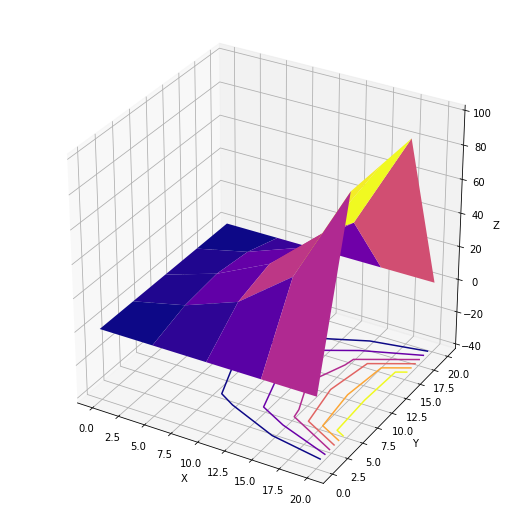

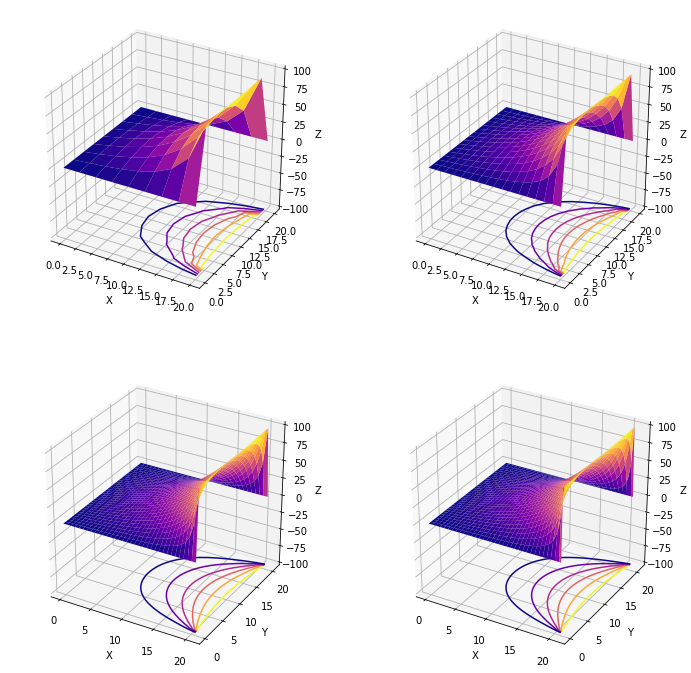

In [66]:
d = 5 #Delta value for x and y

#X range
x_min = 0
x_max = 20

#Y range
y_min = 0
y_max = 20

#Set up space
x = np.arange(x_min, x_max+1, d) #X values. Centered around origin
y = np.arange(y_min, y_max+1, d) #Y values. Centered around origin

xx, yy = np.meshgrid(x, y) #Pre-generate the meshgrid of points for all space we care about

x2 = np.arange(x_min, x_max+1, d/2) #X values. Centered around origin
y2 = np.arange(y_min, y_max+1, d/2) #Y values. Centered around origin

xx2, yy2 = np.meshgrid(x2, y2) #Pre-generate the meshgrid of points for all space we care about

x3 = np.arange(x_min, x_max+1, d/4) #X values. Centered around origin
y3 = np.arange(y_min, y_max+1, d/4) #Y values. Centered around origin

xx3, yy3 = np.meshgrid(x3, y3) #Pre-generate the meshgrid of points for all space we care about

x4 = np.arange(x_min, x_max+1, d/8) #X values. Centered around origin
y4 = np.arange(y_min, y_max+1, d/8) #Y values. Centered around origin

xx4, yy4 = np.meshgrid(x4, y4) #Pre-generate the meshgrid of points for all space we care about

x5 = np.arange(x_min, x_max+1, d/16) #X values. Centered around origin
y5 = np.arange(y_min, y_max+1, d/16) #Y values. Centered around origin

xx5, yy5 = np.meshgrid(x5, y5) #Pre-generate the meshgrid of points for all space we care about

#Runs finite differences for the parameters above.
relaxed = relax(xx, yy)

relaxed2 = relax(xx2, yy2)
relaxed3 = relax(xx3, yy3)
relaxed4 = relax(xx4, yy4)
relaxed5 = relax(xx5, yy5)

#**************Plotting & Stuff***************
plotting = True

if plotting:
    zshift=-100
    plot_contour_surface(xx, yy, relaxed)
    
    fig, ax = plt.subplots(2, 2,  figsize=(12,12), subplot_kw={'projection': '3d'})
    
    surface = ax[0][0].plot_surface(xx2, yy2, relaxed2, cmap='plasma')
    surface.set_facecolor((0,0,0,0))
    ax[0][0].contour(xx2, yy2, relaxed2, zdir='z', cmap='plasma', offset=zshift)
    ax[0][0].set_zlim(zshift, 100)
    ax[0][0].set_xlabel('X')
    ax[0][0].set_ylabel('Y')
    ax[0][0].set_zlabel('Z')
    
    surface = ax[0][1].plot_surface(xx3, yy3, relaxed3, cmap='plasma')
    surface.set_facecolor((0,0,0,0))
    ax[0][1].contour(xx3, yy3, relaxed3, zdir='z', cmap='plasma', offset=zshift)
    ax[0][1].set_zlim(zshift, 100)
    ax[0][1].set_xlabel('X')
    ax[0][1].set_ylabel('Y')
    ax[0][1].set_zlabel('Z')
    
    surface = ax[1][0].plot_surface(xx4, yy4, relaxed4, cmap='plasma')
    surface.set_facecolor((0,0,0,0))
    ax[1][0].contour(xx4, yy4, relaxed4, zdir='z', cmap='plasma', offset=zshift)
    ax[1][0].set_zlim(zshift, 100)
    ax[1][0].set_xlabel('X')
    ax[1][0].set_ylabel('Y')
    ax[1][0].set_zlabel('Z')
    
    surface = ax[1][1].plot_surface(xx5, yy5, relaxed5, cmap='plasma')
    surface.set_facecolor((0,0,0,0))
    ax[1][1].contour(xx5, yy5, relaxed5, zdir='z', cmap='plasma', offset=zshift)
    ax[1][1].set_zlim(zshift, 100)
    ax[1][1].set_xlabel('X')
    ax[1][1].set_ylabel('Y')
    ax[1][1].set_zlabel('Z')
    

Converged in 2622 iterations.


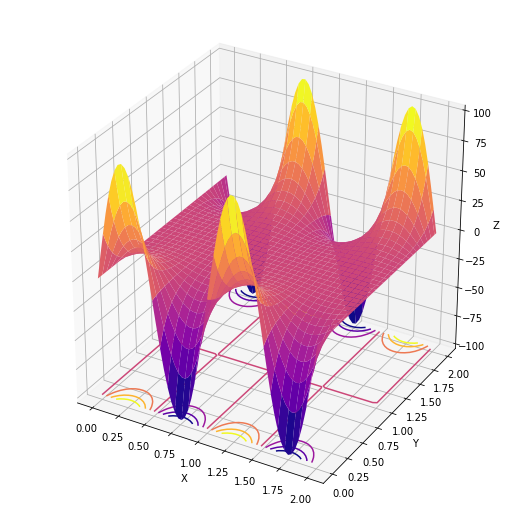

In [67]:
L = 1
d = 64 #Delta value for x and y

#X range
x_min = 0
x_max = L

#Y range
y_min = 0
y_max = 1

#Set up space
x = np.linspace(x_min, x_max+1, d) #X values. Centered around origin
y = np.linspace(y_min, y_max+1, d) #Y values. Centered around origin

xx, yy = np.meshgrid(x, y) #Pre-generate the meshgrid of points for all space we care about

#Runs finite differences for the parameters above.
relaxed = relax(xx, yy, boundary_conditions=boundary_conditions_second, method=gauss_seidel)
#**************Plotting & Stuff***************
plotting = True

if plotting:
    plot_contour_surface(xx, yy, relaxed, zshift=-100)

Converged in 1330 iterations.


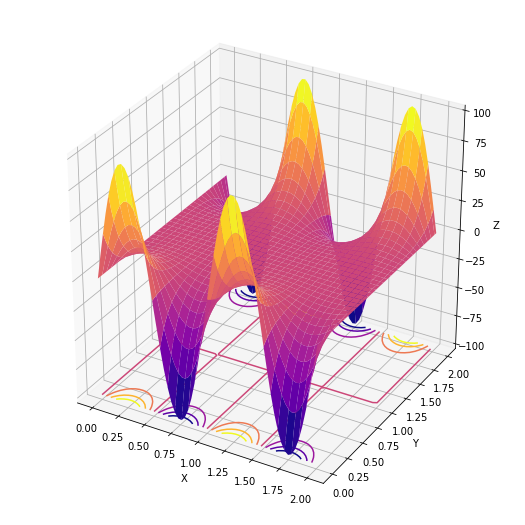

In [68]:
L = 1
d = 64 #Delta value for x and y

#X range
x_min = 0
x_max = L

#Y range
y_min = 0
y_max = 1

#Set up space
x = np.linspace(x_min, x_max+1, d) #X values. Centered around origin
y = np.linspace(y_min, y_max+1, d) #Y values. Centered around origin

xx, yy = np.meshgrid(x, y) #Pre-generate the meshgrid of points for all space we care about

#Runs finite differences for the parameters above.
relaxed = relax(xx, yy, boundary_conditions=boundary_conditions_second)
#**************Plotting & Stuff***************
plotting = True

if plotting:
    plot_contour_surface(xx, yy, relaxed, zshift=-100)